<a href="https://colab.research.google.com/github/bforoura/AML/blob/master/ploynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Polynomal Regression**

In [140]:
# Create random data

import pandas as pd

xdic={'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic={'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000, 17: 407500, 18: 450000, 19: 450000, 20: 485000}}
X=pd.DataFrame.from_dict(xdic)
y=pd.DataFrame.from_dict(ydic)

import numpy as np
X_seq = np.linspace(X.min(),X.max(),100).reshape(-1,1)

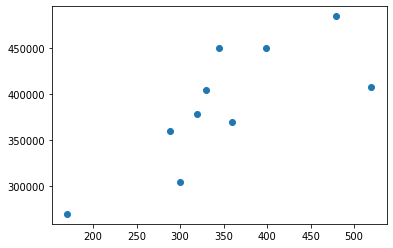

In [141]:
# PLot the data

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.show()

In [143]:
# Create the model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

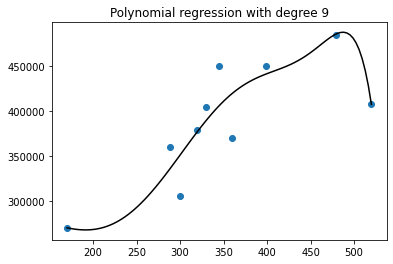

In [146]:
# Plot the results

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [147]:
# What are the polynomial model coeffients?

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=25, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([331078.61696291]),
 array([[ 1.91776336e-53,  4.68791844e-61, -1.11854246e-61,
          6.64689742e-65, -2.37389194e-66,  1.85460308e-68,
          1.81113582e-71,  2.12242478e-73,  2.26153789e-80,
          8.37892396e-79,  2.80454230e-76,  9.19353175e-74,
          2.95468893e-71,  9.27714259e-69,  2.83153891e-66,
          8.34189346e-64,  2.34792293e-61,  6.21655491e-59,
          1.51029571e-56,  3.22268788e-54,  5.52276725e-52,
          5.93891303e-50, -3.82815160e-52,  8.18536600e-55,
         -5.80752663e-58]]))

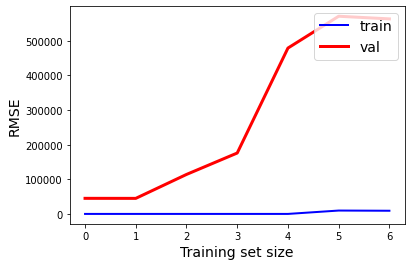

In [149]:
'''
Another way to evaluate a model is to look at the learning curves: these are plots of the model’s per‐
formance on the training set and the validation set as a function of the training set
size (or the training iteration). To generate the plots, train the model several times on
different sized subsets of the training set. The following code defines a function that,
given some training data, plots the learning curves of a model:
'''

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "b", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "r", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              


plot_learning_curves(polyreg, X, y)
                                 